Import libraries

In [98]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

In [87]:
pip install factor-analyzer 

Note: you may need to restart the kernel to use updated packages.


In [99]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer


#Read survey data & drop columns (name,email etc...)

In [114]:
df = pd.read_excel("C:\\Users\\lenovo\\Desktop\\USER PARTICIPATION SURVEY\\user_behaviour.xlsx")
print(df.columns)
df = df.drop(['Name','Email','City','Timestamp','Gender','GeoStamp','GeoCode','GeoAddress',"Highest Qualification",'Any other potential reason, for non-participation of the user in social activities which you think, should be checked to get more insights for user behavior'], axis='columns')


Index(['Timestamp', 'Name', 'Gender', 'Email', 'City',
       'Lack of motivation and unsupportive environment appear sufficient reason for non-participation in social good activities',
       'People think that they don’t have something valuable and worthwhile to contribute to society.',
       'No direct benefit/reputation for participating in social activities',
       ' People have the desire to change  but not sure what to contribute, how and when to contribute',
       'The cultural limitation doesn't allow the user to participate in social good initiatives',
       'It feels good to get involved in the social activities ',
       'Lack of user participation is due to no formal outcomes',
       ' User want s to participate but wants to keep their identity secret',
       ' The user wants to participate but scared of political scenarios in the country',
       'Lack of appreciation  for each person’s contribution to society',
       'Personal life issues and time limitaions dosen

# display 5 rows in data frame

In [115]:
df.head()

,Lack of motivation and unsupportive environment appear sufficient reason for non-participation in social good activities,People think that they don’t have something valuable and worthwhile to contribute to society.,No direct benefit/reputation for participating in social activities,"People have the desire to change but not sure what to contribute, how and when to contribute",The cultural limitation doesn't allow the user to participate in social good initiatives,It feels good to get involved in the social activities,Lack of user participation is due to no formal outcomes,User want s to participate but wants to keep their identity secret,The user wants to participate but scared of political scenarios in the country,Lack of appreciation for each person’s contribution to society,Personal life issues and time limitaions dosen't allow user to participate in social good initiatives,People will participate in social activities if their opinions are valued
0,5.0,5,5.0,3.0,3.0,5.0,5.0,5.0,3.0,5.0,1.0,5.0
1,5.0,2,5.0,3.0,5.0,4.0,5.0,4.0,5.0,5.0,3.0,5.0
2,5.0,4,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,4.0,5.0
3,5.0,3,4.0,5.0,4.0,5.0,5.0,1.0,2.0,4.0,5.0,5.0
4,4.0,4,1.0,5.0,3.0,5.0,4.0,5.0,2.0,3.0,5.0,3.0


In [116]:
df.shape

(193, 12)

In [117]:
df=df.dropna()

In [118]:
df.shape

(92, 12)

In [119]:
df.shape

(92, 12)

In [120]:
df.corr()


,Lack of motivation and unsupportive environment appear sufficient reason for non-participation in social good activities,No direct benefit/reputation for participating in social activities,"People have the desire to change but not sure what to contribute, how and when to contribute",The cultural limitation doesn't allow the user to participate in social good initiatives,It feels good to get involved in the social activities,Lack of user participation is due to no formal outcomes,User want s to participate but wants to keep their identity secret,The user wants to participate but scared of political scenarios in the country,Lack of appreciation for each person’s contribution to society,Personal life issues and time limitaions dosen't allow user to participate in social good initiatives,People will participate in social activities if their opinions are valued
Lack of motivation and unsupportive environment appear sufficient reason for non-participation in social good activities,1.000000,0.178340,0.286892,0.074422,0.222454,0.050656,0.150207,0.342697,0.250497,0.223634,0.235484
No direct benefit/reputation for participating in social activities,0.178340,1.000000,-0.018598,0.242911,0.004006,0.224669,-0.010724,0.151647,0.294230,0.152529,0.182481
"People have the desire to change but not sure what to contribute, how and when to contribute",0.286892,-0.018598,1.000000,0.011265,0.415613,-0.004705,0.048108,0.273518,0.204492,0.398489,0.093470
The cultural limitation doesn't allow the user to participate in social good initiatives,0.074422,0.242911,0.011265,1.000000,0.037366,0.158131,0.103937,0.083834,0.167170,0.265948,0.171091
It feels good to get involved in the social activities,0.222454,0.004006,0.415613,0.037366,1.000000,0.103055,0.209234,0.103686,0.191418,0.224983,0.364084
Lack of user participation is due to no formal outcomes,0.050656,0.224669,-0.004705,0.158131,0.103055,1.000000,0.175254,0.097879,0.157512,0.053336,0.424335
User want s to participate but wants to keep their identity secret,0.150207,-0.010724,0.048108,0.103937,0.209234,0.175254,1.000000,0.217700,-0.084215,-0.140878,-0.142876
The user wants to participate but scared of political scenarios in the country,0.342697,0.151647,0.273518,0.083834,0.103686,0.097879,0.217700,1.000000,0.437275,0.205522,0.312712
Lack of appreciation for each person’s contribution to society,0.250497,0.294230,0.204492,0.167170,0.191418,0.157512,-0.084215,0.437275,1.000000,0.252057,0.406059
Personal life issues and time limitaions dosen't allow user to participate in social good initiatives,0.223634,0.152529,0.398489,0.265948,0.224983,0.053336,-0.140878,0.205522,0.252057,1.000000,0.141668


In [121]:
covar_matrix = PCA(n_components = len(df.columns)) #components are equal to the number of features we have
covar_matrix.fit(df)

PCA(n_components=12)

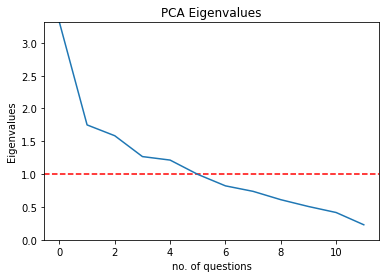

In [122]:
plt.ylabel('Eigenvalues')
plt.xlabel('no. of questions')
plt.title('PCA Eigenvalues')
plt.ylim(0,max(covar_matrix.explained_variance_))
plt.style.context('seaborn-whitegrid')
plt.axhline(y=1, color='r', linestyle='--')
plt.plot(covar_matrix.explained_variance_)
plt.show()

In [123]:
components = pd.DataFrame(covar_matrix.components_ ,columns = df.columns)
components.rename(index = lambda x: 'PC-' + str(x + 1), inplace=True)

# Top 3 positive contributors
pd.DataFrame(components.columns.values[np.argsort(-components.values, axis=1)[:, :3]], 
                  index=components.index,
                  columns = ['1st Max','2nd Max','3rd Max'])

,1st Max,2nd Max,3rd Max
PC-1,User want s to participate but wants to keep ...,Lack of user participation is due to no formal...,The cultural limitation doesn't allow the user...
PC-2,No direct benefit/reputation for participating...,Personal life issues and time limitaions dosen...,Lack of appreciation for each person’s contri...
PC-3,People have the desire to change but not sur...,Personal life issues and time limitaions dosen...,It feels good to get involved in the social ac...
PC-4,Lack of user participation is due to no formal...,People will participate in social activities i...,It feels good to get involved in the social ac...
PC-5,The cultural limitation doesn't allow the user...,Personal life issues and time limitaions dosen...,It feels good to get involved in the social ac...
PC-6,It feels good to get involved in the social ac...,No direct benefit/reputation for participating...,People think that they don’t have something va...
PC-7,The cultural limitation doesn't allow the user...,People think that they don’t have something va...,People will participate in social activities i...
PC-8,It feels good to get involved in the social ac...,Lack of appreciation for each person’s contri...,People have the desire to change but not sur...
PC-9,Lack of user participation is due to no formal...,People think that they don’t have something va...,People have the desire to change but not sur...
PC-10,The user wants to participate but scared of p...,People will participate in social activities i...,It feels good to get involved in the social ac...


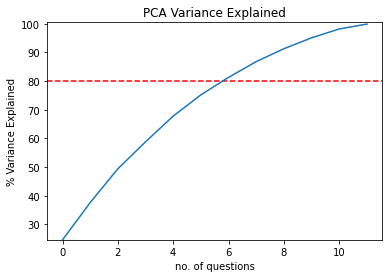

In [124]:
variance = covar_matrix.explained_variance_ratio_ #calculate variance ratios
var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)

plt.ylabel('% Variance Explained')
plt.xlabel('no. of questions')
plt.title('PCA Variance Explained')
plt.ylim(min(var),100.5)
plt.style.context('seaborn-whitegrid')
plt.axhline(y=80, color='r', linestyle='--')
plt.plot(var)
plt.show()

In [125]:
components = pd.DataFrame(covar_matrix.components_ ,columns = df.columns)
components.rename(index = lambda x: 'PC-' + str(x + 1), inplace=True)

# Top 3 positive contributors
pd.DataFrame(components.columns.values[np.argsort(-components.values, axis=1)[:, :3]], 
                  index=components.index,
                  columns = ['1st Max','2nd Max','3rd Max'])

,1st Max,2nd Max,3rd Max
PC-1,User want s to participate but wants to keep ...,Lack of user participation is due to no formal...,The cultural limitation doesn't allow the user...
PC-2,No direct benefit/reputation for participating...,Personal life issues and time limitaions dosen...,Lack of appreciation for each person’s contri...
PC-3,People have the desire to change but not sur...,Personal life issues and time limitaions dosen...,It feels good to get involved in the social ac...
PC-4,Lack of user participation is due to no formal...,People will participate in social activities i...,It feels good to get involved in the social ac...
PC-5,The cultural limitation doesn't allow the user...,Personal life issues and time limitaions dosen...,It feels good to get involved in the social ac...
PC-6,It feels good to get involved in the social ac...,No direct benefit/reputation for participating...,People think that they don’t have something va...
PC-7,The cultural limitation doesn't allow the user...,People think that they don’t have something va...,People will participate in social activities i...
PC-8,It feels good to get involved in the social ac...,Lack of appreciation for each person’s contri...,People have the desire to change but not sur...
PC-9,Lack of user participation is due to no formal...,People think that they don’t have something va...,People have the desire to change but not sur...
PC-10,The user wants to participate but scared of p...,People will participate in social activities i...,It feels good to get involved in the social ac...


In [126]:
df.corr() #data output


,Lack of motivation and unsupportive environment appear sufficient reason for non-participation in social good activities,No direct benefit/reputation for participating in social activities,"People have the desire to change but not sure what to contribute, how and when to contribute",The cultural limitation doesn't allow the user to participate in social good initiatives,It feels good to get involved in the social activities,Lack of user participation is due to no formal outcomes,User want s to participate but wants to keep their identity secret,The user wants to participate but scared of political scenarios in the country,Lack of appreciation for each person’s contribution to society,Personal life issues and time limitaions dosen't allow user to participate in social good initiatives,People will participate in social activities if their opinions are valued
Lack of motivation and unsupportive environment appear sufficient reason for non-participation in social good activities,1.000000,0.178340,0.286892,0.074422,0.222454,0.050656,0.150207,0.342697,0.250497,0.223634,0.235484
No direct benefit/reputation for participating in social activities,0.178340,1.000000,-0.018598,0.242911,0.004006,0.224669,-0.010724,0.151647,0.294230,0.152529,0.182481
"People have the desire to change but not sure what to contribute, how and when to contribute",0.286892,-0.018598,1.000000,0.011265,0.415613,-0.004705,0.048108,0.273518,0.204492,0.398489,0.093470
The cultural limitation doesn't allow the user to participate in social good initiatives,0.074422,0.242911,0.011265,1.000000,0.037366,0.158131,0.103937,0.083834,0.167170,0.265948,0.171091
It feels good to get involved in the social activities,0.222454,0.004006,0.415613,0.037366,1.000000,0.103055,0.209234,0.103686,0.191418,0.224983,0.364084
Lack of user participation is due to no formal outcomes,0.050656,0.224669,-0.004705,0.158131,0.103055,1.000000,0.175254,0.097879,0.157512,0.053336,0.424335
User want s to participate but wants to keep their identity secret,0.150207,-0.010724,0.048108,0.103937,0.209234,0.175254,1.000000,0.217700,-0.084215,-0.140878,-0.142876
The user wants to participate but scared of political scenarios in the country,0.342697,0.151647,0.273518,0.083834,0.103686,0.097879,0.217700,1.000000,0.437275,0.205522,0.312712
Lack of appreciation for each person’s contribution to society,0.250497,0.294230,0.204492,0.167170,0.191418,0.157512,-0.084215,0.437275,1.000000,0.252057,0.406059
Personal life issues and time limitaions dosen't allow user to participate in social good initiatives,0.223634,0.152529,0.398489,0.265948,0.224983,0.053336,-0.140878,0.205522,0.252057,1.000000,0.141668


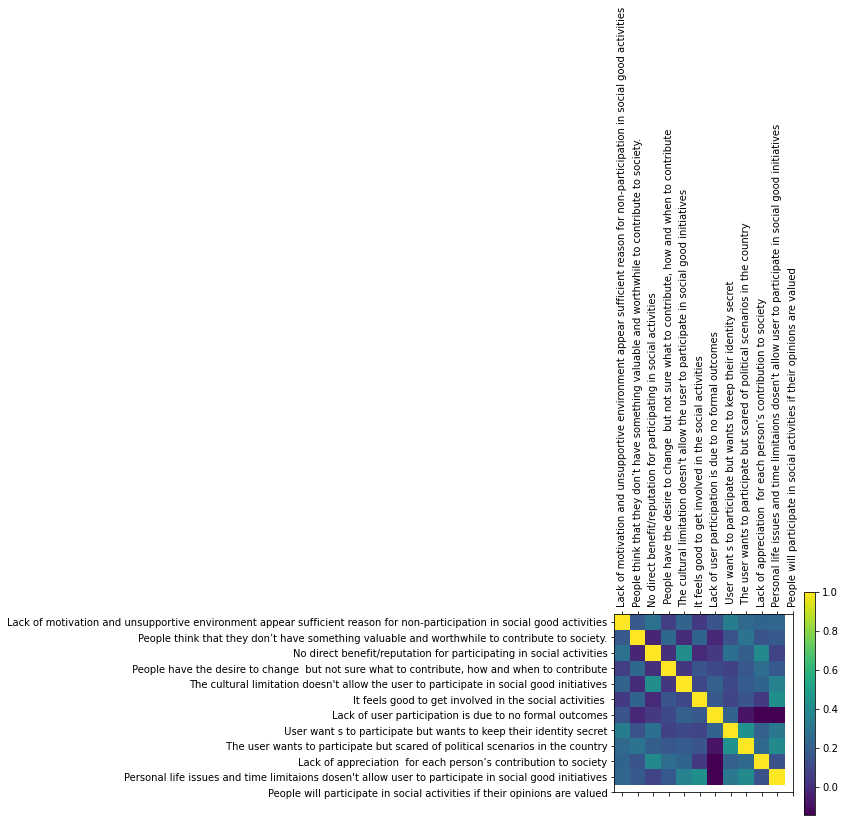

In [127]:
plt.matshow(df.corr())
plt.xticks(range(len(df.columns)), df.columns, rotation='vertical')
plt.yticks(range(len(df.columns)), df.columns)
plt.colorbar()
plt.show()


In [128]:
fa = FactorAnalyzer(rotation=None, n_factors=len(df.columns))
fa.fit(df)

# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([2.99669535, 1.50707906, 1.2848705 , 1.20553158, 1.04861763,
       0.85646948, 0.72564209, 0.67308789, 0.6053356 , 0.46471128,
       0.40825975, 0.2236998 ])

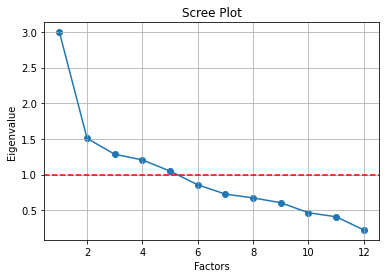

In [129]:
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='r', linestyle='--')
plt.grid()
plt.show()

In [132]:
fa = FactorAnalyzer(rotation="varimax", n_factors=3)
fa.fit(df)

# Check loadings
loadings = pd.DataFrame(fa.loadings_)
loadings.rename(columns = lambda x: 'Factor-' + str(x + 1), inplace=True)
loadings.index = df.columns
loadings

,Factor-1,Factor-2,Factor-3
Lack of motivation and unsupportive environment appear sufficient reason for non-participation in social good activities,0.485316,0.208064,0.097954
People think that they don’t have something valuable and worthwhile to contribute to society.,0.425768,0.060032,0.003354
No direct benefit/reputation for participating in social activities,0.116329,0.388548,-0.029781
"People have the desire to change but not sure what to contribute, how and when to contribute",0.723825,-0.057809,-0.005727
The cultural limitation doesn't allow the user to participate in social good initiatives,0.115048,0.291634,0.041983
It feels good to get involved in the social activities,0.424503,0.171975,0.125520
Lack of user participation is due to no formal outcomes,-0.091509,0.555344,0.157316
User want s to participate but wants to keep their identity secret,0.095724,0.017344,1.005208
The user wants to participate but scared of political scenarios in the country,0.431616,0.327169,0.129409
Lack of appreciation for each person’s contribution to society,0.374651,0.493199,-0.124120


In [133]:
segments = loadings[loadings >= .4].fillna(loadings[loadings <= -.4])
segments

,Factor-1,Factor-2,Factor-3
Lack of motivation and unsupportive environment appear sufficient reason for non-participation in social good activities,0.485316,NaN,NaN
People think that they don’t have something valuable and worthwhile to contribute to society.,0.425768,NaN,NaN
No direct benefit/reputation for participating in social activities,NaN,NaN,NaN
"People have the desire to change but not sure what to contribute, how and when to contribute",0.723825,NaN,NaN
The cultural limitation doesn't allow the user to participate in social good initiatives,NaN,NaN,NaN
It feels good to get involved in the social activities,0.424503,NaN,NaN
Lack of user participation is due to no formal outcomes,NaN,0.555344,NaN
User want s to participate but wants to keep their identity secret,NaN,NaN,1.005208
The user wants to participate but scared of political scenarios in the country,0.431616,NaN,NaN
Lack of appreciation for each person’s contribution to society,NaN,0.493199,NaN


In [134]:
factorVariance = pd.DataFrame(fa.get_factor_variance())
factorVariance.rename(columns = lambda x: 'Factor-' + str(x + 1), inplace=True)
factorVariance.index = ['SS Loadings', 'Proportion Variance', 'Cumulative Variance']
factorVariance

,Factor-1,Factor-2,Factor-3
SS Loadings,1.735458,1.481921,1.136980
Proportion Variance,0.144622,0.123493,0.094748
Cumulative Variance,0.144622,0.268115,0.362863
